In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef


C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [4]:
titanic_data = titanic

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
Y=titanic_data.Survived

In [8]:
from sklearn import tree

In [9]:
clf = tree.DecisionTreeClassifier()

In [10]:
X = pd.get_dummies(X)

In [11]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [12]:
X.Age.median()

28.0

In [13]:
X=X.fillna({'Age':X.Age.median()})

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [15]:
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
clf.score(X,Y)

0.9797979797979798

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [18]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
clf.score(X_test, Y_test)

0.7627118644067796

In [20]:
max_depth_values = range(1, 100)

In [21]:
score_data = pd.DataFrame()

In [22]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    score_data = score_data.append(temp_score_data)

In [23]:
score_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [24]:
score_data_long = pd.melt(score_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], var_name='set_type', value_name='score')

In [25]:
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


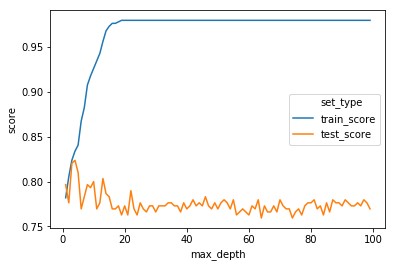

In [26]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)

In [27]:
import seaborn as sns
sns.__version__

'0.9.0'

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
cross_val_score(clf, X_train, Y_train, cv=5)

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [31]:
cross_val_score(clf, X_train, Y_train, cv=5).mean()

0.7835799743626264

In [32]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    
    mean_cross_val_score=cross_val_score(clf, X_train, Y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})
    score_data = score_data.append(temp_score_data)

In [33]:
score_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,NaN
0,2,0.805369,0.776271,NaN
0,3,0.823826,0.820339,NaN
0,4,0.833893,0.823729,NaN
0,5,0.840604,0.810169,NaN


In [34]:
score_data_long = pd.melt(score_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')

In [35]:
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


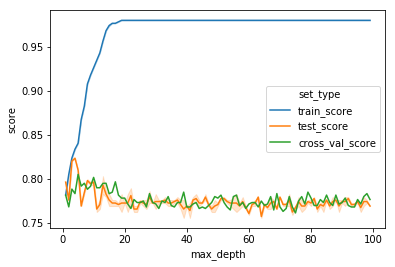

In [36]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn import tree

In [38]:
clf = tree.DecisionTreeClassifier()

In [39]:
parametrs={'criterion': ['gini', 'entropy'], 'max_depth': range(1,30 )}

In [40]:
grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5)

In [41]:
grid_search_cv_clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 13}

In [43]:
best_clf = grid_search_cv_clf.best_estimator_

In [44]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
best_clf.score(X_test, Y_test)

0.7898305084745763

In [46]:
from sklearn.metrics import precision_score, recall_score

In [47]:
Y_pred=best_clf.predict(X_test)

In [48]:
precision_score(Y_test, Y_pred)

0.7416666666666667

In [49]:
recall_score(Y_test, Y_pred)

0.7416666666666667

In [50]:
Y_predicted_prob=best_clf.predict_proba(X_test)

In [51]:
Y_predicted_prob[:, 1]

array([1.        , 0.        , 0.25      , 1.        , 1.        ,
       0.        , 0.83333333, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.5       ,
       1.        , 0.        , 1.        , 0.04166667, 0.        ,
       0.        , 1.        , 0.25      , 0.25      , 0.04166667,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.25      ,
       0.25      , 0.        , 0.83333333, 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.13043478, 0.        ,
       0.        , 0.25      , 0.04166667, 0.13043478, 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.44444444, 1.        , 1.        , 0.        , 0.13043478,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.     

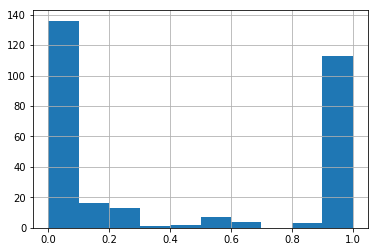

In [52]:
pd.Series(Y_predicted_prob[:, 1]).hist()

In [53]:
import numpy as np

In [54]:
Y_pred = np.where(Y_predicted_prob[:, 1] > 0.9, 1, 0)

In [55]:
precision_score(Y_test, Y_pred)

0.7522123893805309

In [56]:
recall_score(Y_test, Y_pred)

0.7083333333333334

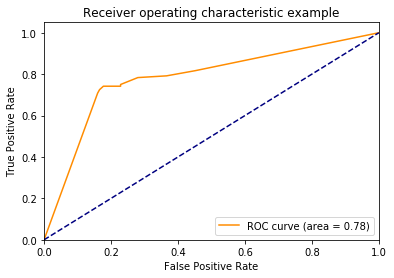

In [57]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()